# Credict Book Valuation Analysis

## Exercise 2

#### Done by: Darren Ramsook, Date: 6th Nov., 2019

Works on Python3.6 and above

In [1]:
# Libraries used for this task:
import pandas as pd #Pandas for Data Manipulation
import seaborn as sns #Seaborn for Data Plotting
import matplotlib.pyplot as plt #Matplotlib for graphics rendering
from sklearn.preprocessing import OrdinalEncoder #Encoding categorical variables
from sklearn.model_selection import train_test_split # Splitting dataset
from sklearn.linear_model import SGDClassifier #ML Algorithm
from sklearn.metrics import accuracy_score #Accuracy Measure
from sklearn.metrics import f1_score
import numpy as np #Computing Library

The data credit book valuation data is located in the "Data/" directory. This data can be loaded and the top 10 rows examined further, and the column data and their interpreted data types can be list:

In [2]:
creditBookDF = pd.read_csv("Data/exercise2_data.csv")
print("Column Titles and Datatypes:\n"+str(creditBookDF.dtypes))
print("\n\nTop 10 rows of data:\n")
creditBookDF.head(10)

Column Titles and Datatypes:
account_no                      object
gender                          object
age                              int64
income                           int64
loan_amount                      int64
term                             int64
installment_amount               int64
interest_rate                  float64
credit_score_at_application      int64
outstanding_balance              int64
status                          object
dtype: object


Top 10 rows of data:



,account_no,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
0,acc_00000316,F,18,12143,47000,60,1045,0.12,860,0,PAID_UP
1,acc_00000422,F,18,6021,13000,60,330,0.18,640,0,PAID_UP
2,acc_00001373,F,39,12832,13000,60,296,0.13,820,0,PAID_UP
3,acc_00001686,F,33,4867,5000,36,191,0.22,540,0,PAID_UP
4,acc_00001733,F,23,5107,22000,36,818,0.20,580,11314,LIVE
5,acc_00002114,M,38,9328,25000,36,904,0.18,630,0,PAID_UP
6,acc_00002270,F,18,5763,15000,60,381,0.18,630,0,PAID_UP
7,acc_00002927,M,42,12762,24000,48,668,0.15,730,0,PAID_UP
8,acc_00003222,M,43,6718,16000,48,522,0.24,520,2923,DEFAULT
9,acc_00006967,F,38,9662,17000,48,482,0.16,720,0,PAID_UP


### Initial Observation

From initial observation we can note the data has the following columns: 
* account_no (categorical), 
* gender (categorical), 
* age (numerical-continuous), 
* income (numerical-continuous), 
* term (numerical-continuous), 
* installment_amount (numerical-continuous), 
* interest_rate (numerical-continuous), 
* credit_score_at_application (numerical-continuous), 
* outstanding_balance(numerical-continuous) and 
* status (categorical).

Using this data we can now determine relationships using visual methods.

We can analyze the data further by looking at a pairplot between all the variables and having a general idea of their relationship and their histogram by producing a pair-wise plot across all variables.

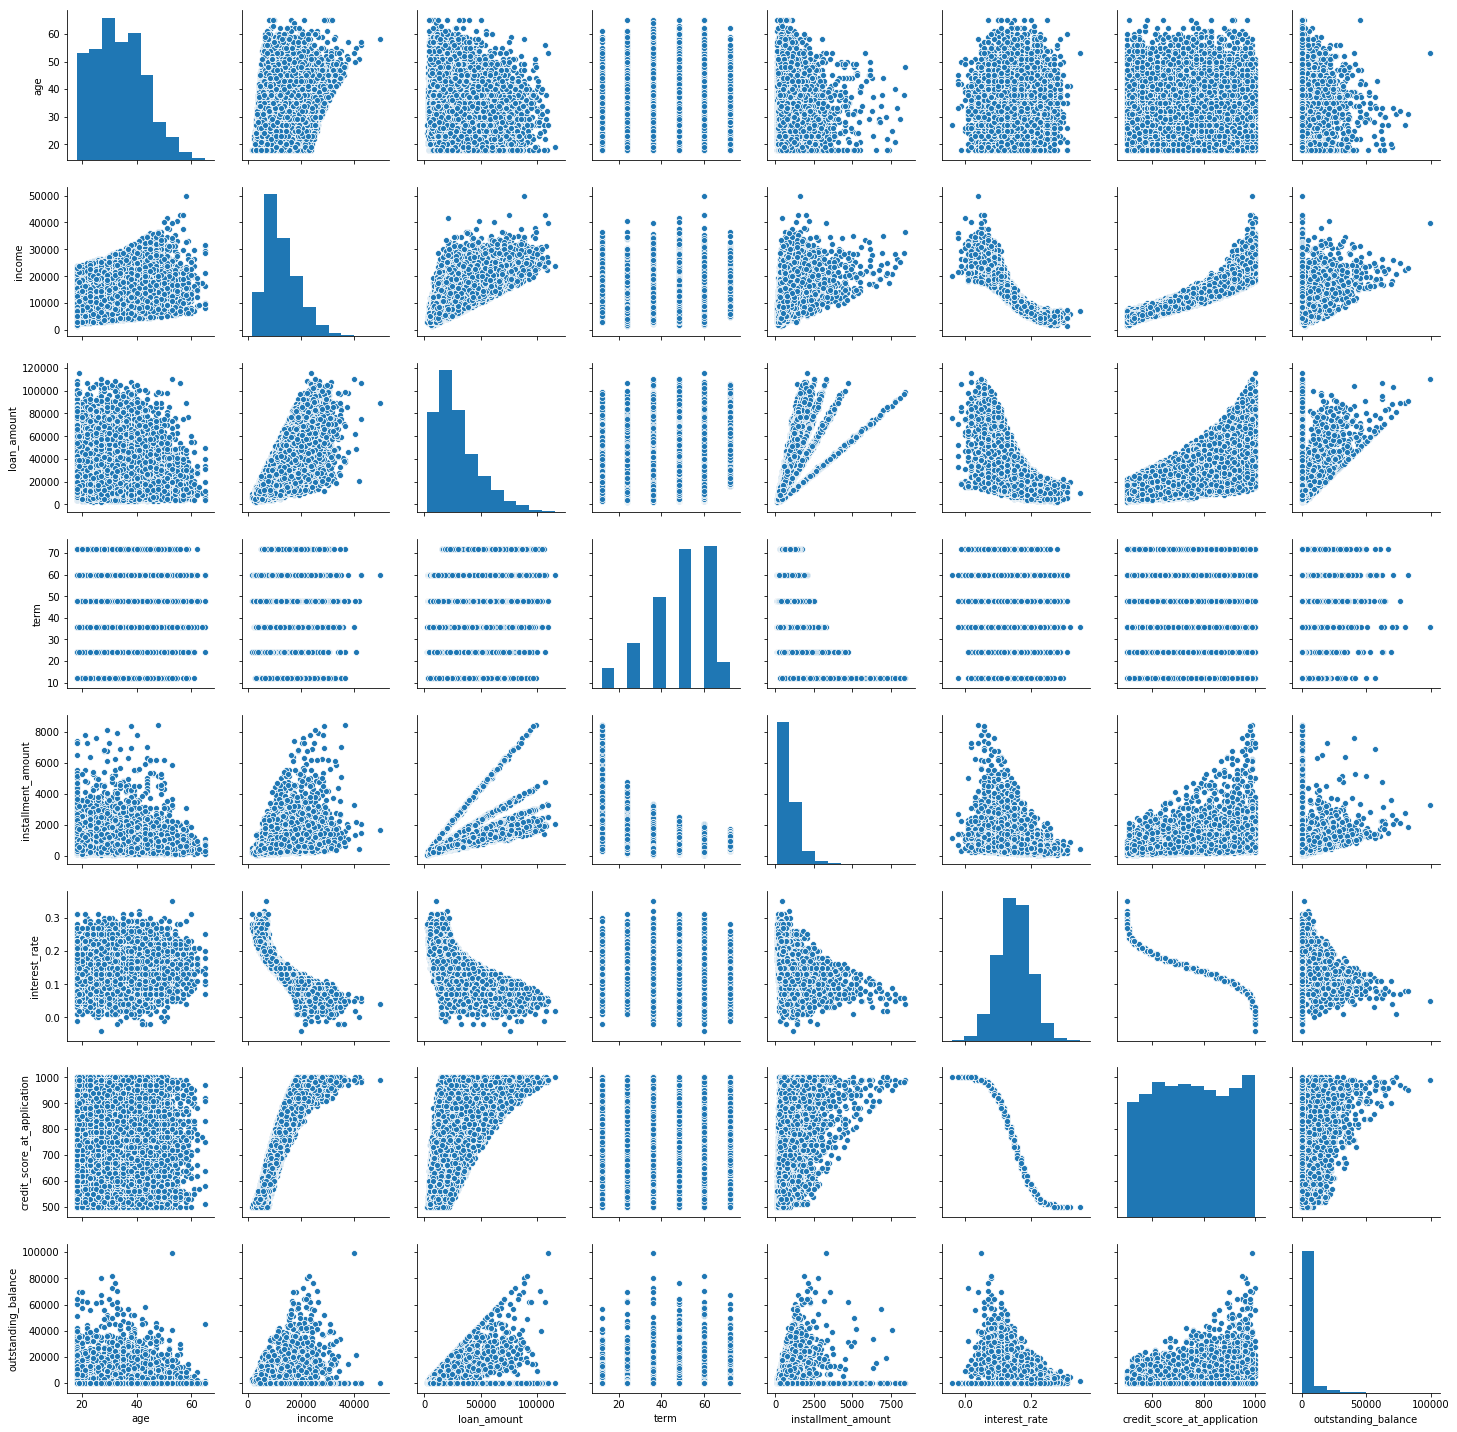

In [3]:
pairplotCreditDF = sns.pairplot(creditBookDF)
plt.show()

From the pairplot, we can see some interesting trends, for example (and most notable) that the relationship between credit_score_at_application and interest_rate follows something resembling an **INVERSE SIGMOID** relationship.

Also the term variable is bunched together at regular intervals when related to all other variables. This indicates that the term may actually be categorical instead of a continuous number as once thought.

Also the distribution of variables can be seen from the self interseciton points. For example age, income, loan_amount and installment_amount seems as it follows a **GAMMA DISTRIBUTION**, while interest rate follows a **NORMAL DISTRIBUTION**.

The color palette and indiscrimination between data points makes it a bit hard to actually visualize the data. This can be changed via the following.

/Users/darrenramsook/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/darrenramsook/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


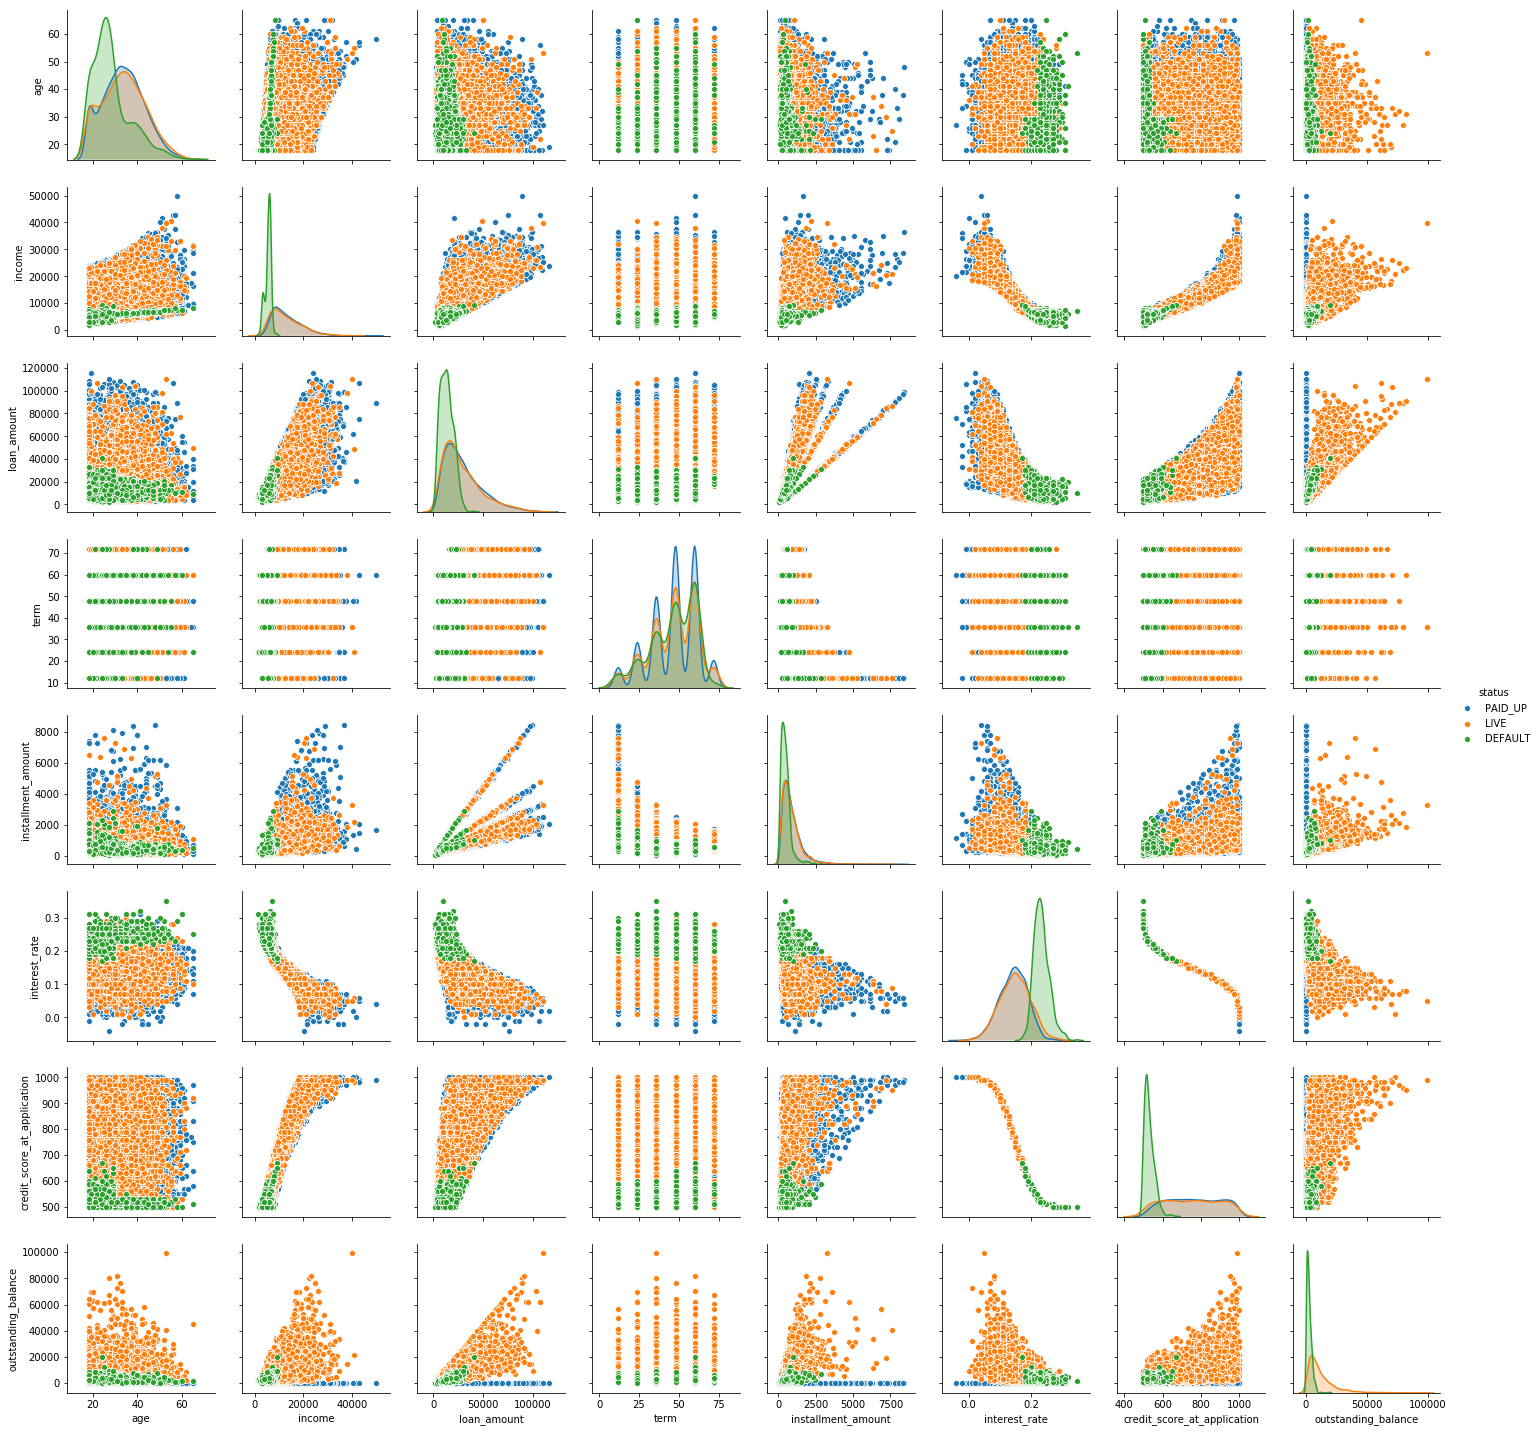

In [4]:
pairplotCDFCategory = sns.pairplot(creditBookDF, hue="status")
plt.show()

# Warning will show if on python 3.6, ignore 

Various decision boundaries on pairwise variables can be seen and separated from visual inspection, such as credit_score_at_application and interest_rate.


To get a better idea of the distributions we can perform **Kernel Density Estimation** on the data and also try to fit linear relationships between the data. This is done as shown below:

/Users/darrenramsook/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/darrenramsook/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


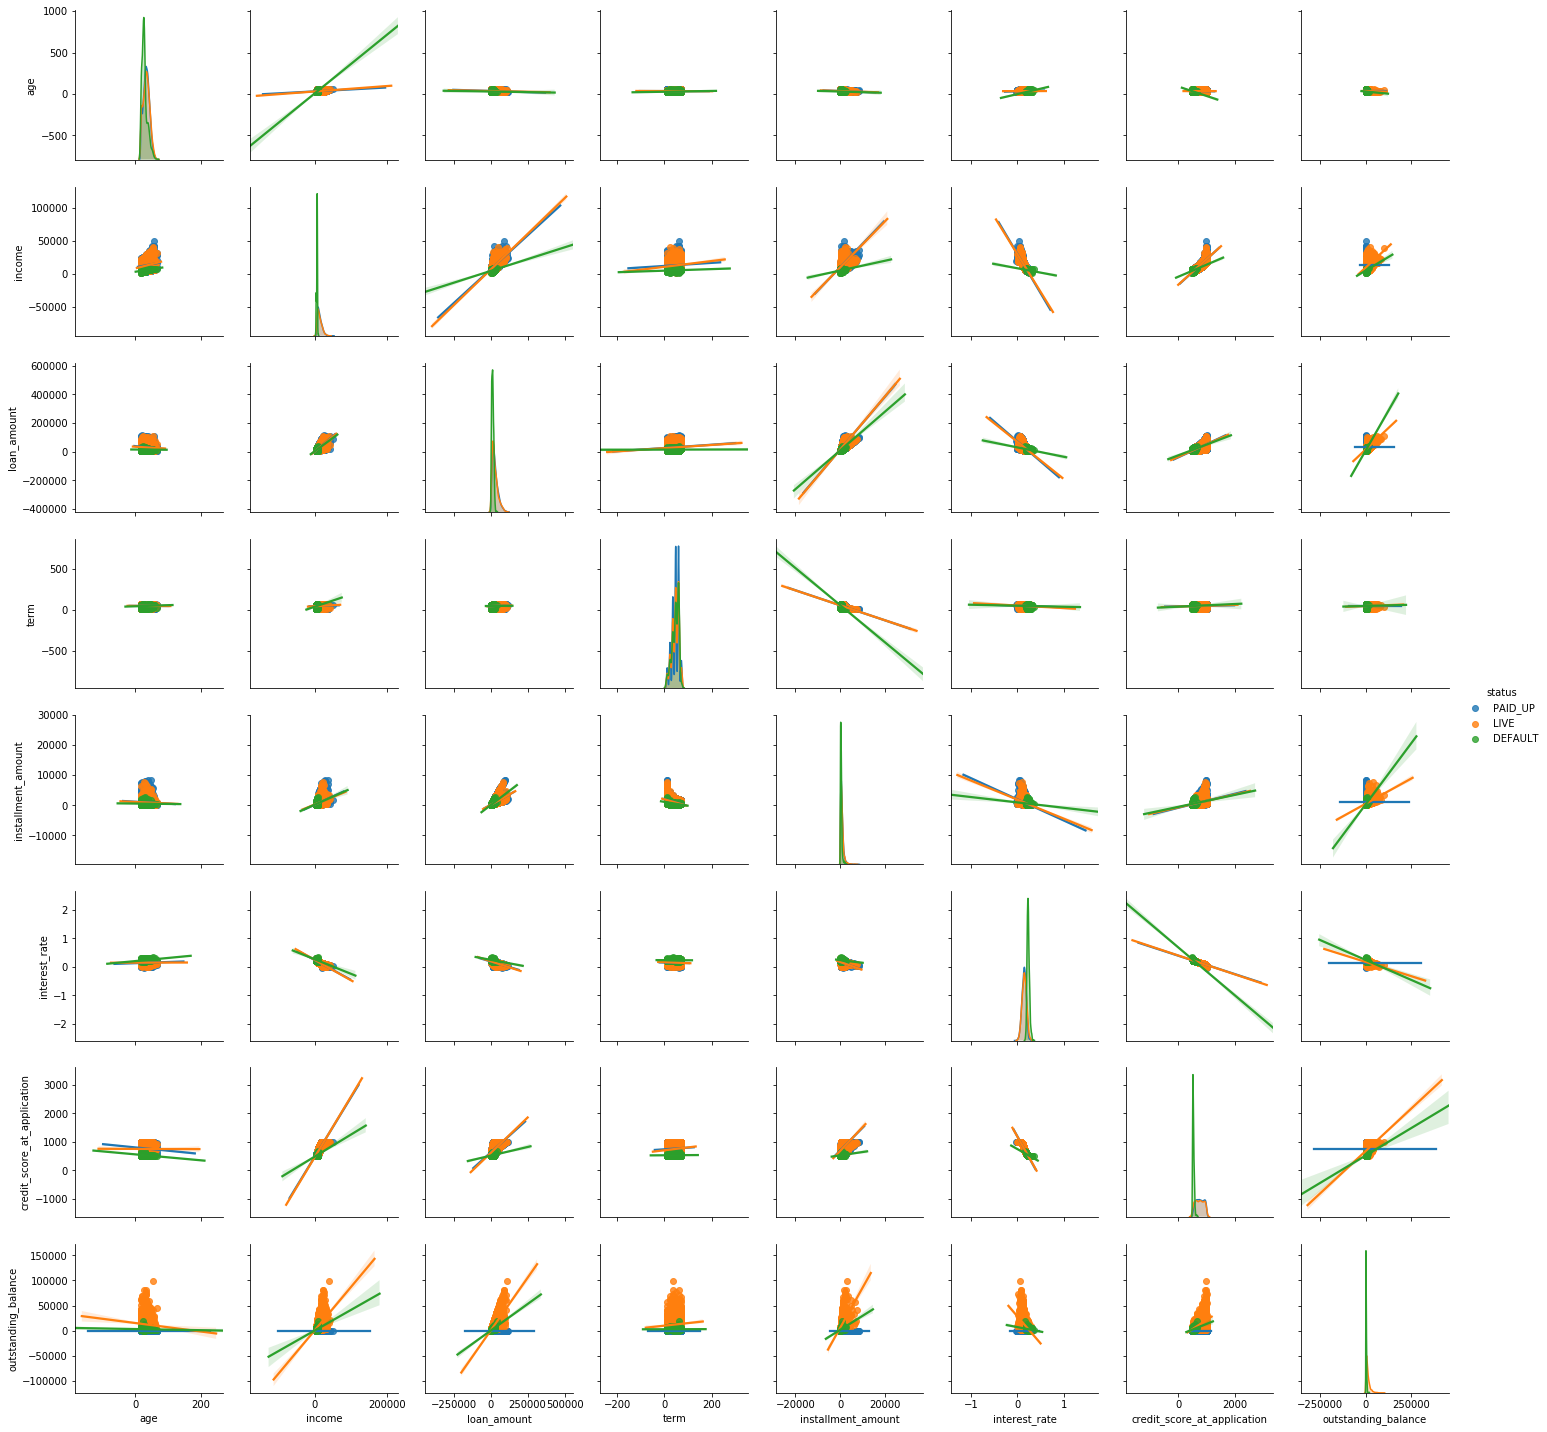

In [5]:
pairplotCDFCatKDE = sns.pairplot(creditBookDF, hue="status", kind = "reg",diag_kind="kde")
plt.show()

# Warning will show if on python 3.6, ignore 
# This will take some time to run as it is running KDE as well as fitting a linear reg on all variables

The relationship between some variables are a bit complex, however we can still model non-linear relationships using other methods.


## Modelling Using Probabilistic Methods

The data is first split into historical and current data. The categorical data is encoded at this stage to save computation time.

The problem requires to find the probability that someone defaults, in this case, we can group "PAID_UP" and "LIVE" into one category.

In [6]:
creditBookMLDF = creditBookDF.copy()

historicalDF = creditBookMLDF[creditBookMLDF['status'] != "LIVE"]
currentDF = creditBookMLDF[creditBookMLDF['status'] == "LIVE"]
creditBookMLDF['status'] = creditBookMLDF['status'].replace({'PAID_UP': 'X', 'LIVE': 'X'})

print("Dimensions of Data:")
print("Historical DataFrame: (#rows:"+str(historicalDF.shape[0])+" , #columns: "+str(historicalDF.shape[1])+")")
print("Current DataFrame: (#rows:"+str(currentDF.shape[0])+" , #columns: "+str(currentDF.shape[1])+")")

Dimensions of Data:
Historical DataFrame: (#rows:9997 , #columns: 11)
Current DataFrame: (#rows:2001 , #columns: 11)


From this information, we can determine the following split for the data:
* 80% of the Historical Data would be utilized for training
* The remaining 20% of the Historical Data would be used as a test set

The only categorical data used will be the "gender" field and the output status field.

Preparing the data:

In [7]:
historicalDF['status'] = historicalDF['status'].replace({'PAID_UP': 'X', 'LIVE': 'X'})
currentDF['status'] = currentDF['status'].replace({'PAID_UP': 'X', 'LIVE': 'X'})

# Create and fit Encoders
genEncoder = OrdinalEncoder()
statusEncoder = OrdinalEncoder()
genEncoder = genEncoder.fit(creditBookMLDF.gender.values.reshape(-1,1))
statusEncoder = statusEncoder.fit(creditBookMLDF.status.values.reshape(-1,1))

# Transform Data
historicalDF['status'] = statusEncoder.transform(historicalDF.status.values.reshape(-1,1))
historicalDF['gender'] = genEncoder.transform(historicalDF.gender.values.reshape(-1,1))

# Splitting encoded data into train test sets now
trainDFX = historicalDF.drop(['outstanding_balance','account_no','status'],axis=1)
trainDFY = historicalDF['status']
X_train, X_test, y_train, y_test = train_test_split(trainDFX,trainDFY,test_size = 0.2,random_state=1)

/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

### Using a Probabilistic model to create predicitons

Logistic Regression Classifier was trained using the l2 loss results in a probability between 0-1 of the output.

In [8]:
from sklearn.linear_model import LogisticRegression

lf = LogisticRegression(penalty ='l2', tol=1e-4,solver='lbfgs').fit(X_train, y_train)
y_pred_actual = lf.predict(X_test)
y_pred_probability = lf.predict_proba(X_test)

print("mean accuracy on the given test data and labels: " + str(lf.score(X_test, y_test)))
print("F1 score: " + str(f1_score(y_test, y_pred_actual)))

mean accuracy on the given test data and labels: 0.92
F1 score: 0.957649550026469


/Users/darrenramsook/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Forecasting for remainder of data



In [9]:
lfInputs = currentDF.drop(['outstanding_balance','account_no','status'],axis=1)
lfInputs['gender'] = genEncoder.transform(lfInputs.gender.values.reshape(-1,1))
currentDF['DefaultProb'] = ''
currentDF['DefaultProb'] = lf.predict_proba(lfInputs)

/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Expected Repayment amount for Loan

In [10]:
currentDF['ExpectedRepay'] = ''
currentDF['ExpectedRepay'] = (1 - currentDF['DefaultProb'])*currentDF['outstanding_balance']

/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/darrenramsook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
print("Total Expected Sum: " + str(currentDF['ExpectedRepay'].sum()))

ExpectedRepaySum = currentDF['ExpectedRepay'].sum()
OutstandingBalanceSum = currentDF['outstanding_balance'].sum()
ratio = ExpectedRepaySum/OutstandingBalanceSum

paidUpcount = creditBookDF[creditBookDF['status'] == 'PAID_UP'].shape[0]
defaultcount = creditBookDF[creditBookDF['status'] == 'DEFAULT'].shape[0]
countRatio = paidUpcount/defaultcount
print("Ratio of Expected Sum to Outstanding Balance Sum: " + str(ratio))
print("Ratio of PAID_UP to DEFAULT loans: "+str(countRatio))

Total Expected Sum: 23834921.37812521
Ratio of Expected Sum to Outstanding Balance Sum: 0.9680291579436552
Ratio of PAID_UP to DEFAULT loans: 13.50943396226415


*Need Clarification on ratio calculations*